<a href="https://colab.research.google.com/github/jrojasmo/EjerciciosML-2021-I/blob/main/Ejercicios1_ML_jrojasmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción al Aprendizaje de Máquina 2021-I \\
*Jesús Andrés Rojas Montenegro*

#**1. Ejercicio 1.2**
Supongamos que usamos un perceptrón para detectar mensajes de spam. Digamos que cada mensaje de correo es representado por la frecuencia de ocurrencia palabras clave, y  la salida es $+1$ si el mensaje es considerado spam.

**(a)** ¿Cuáles serían algunas palabras que darían como resultado un peso positivo grande en el perceptrón?

Creería que hay dos grandes grupos de palabras, las relacionadas con ofertas dudosas: gratis, regalo, herencia, millones de pesos, fortuna, únete a millones de personas, sin compromiso, Sé tu propio jefe!, etc.
Y las palabras sensacionalistas y engaños como: baja de peso, desnudos, sexo, conspiración, fotos comprometedoras de ..., viagra, no lo podrás creer!, etc. 



**(b)** ¿Cuáles palabras clave resultan en pesos negativos?

Diría que las más seguras son las que tienen que ver con rutinas o responsabilidades como: factura, extracto, pago, cuenta, recordatorio, aviso, notificación, invitación, calendario, etc. 

**(c)** ¿Qué parámetro en el perceptrón afecta directamente la cantidad de mensajes dudosos terminan siendo clasificados como spam?
 
El umbral o el sesgo del perceptrón que se fije para resolver el problema, porque es básicamente lo que decide si un mensaje es spam o no. Además, si se ve que la separación que hace perceptrón no está siendo satisfactoria, se puede subir o bajar el umbral para ser menos o más estrictos con la clasificación de un mensaje.


#**2. Ejercicio 1.3**
La regla de actualización de pesos en el algoritmo de aprendizaje de perceptron (*PLA*) tiene una buena interpretación que puede dirigir a clasificar $\textbf{x($t$)}$ correctamente.

**(a)** Mostrar que $\textbf{$y(t)$w$^T(t)$x$(t)<0$}$.

Es fácil ver que, al estar $\textbf{x$(t)$}$ mal clasificado por $\textbf{w$(t)$}$, $\textbf{sign(w$^T(t)$x$(t)$)}\neq$ y$(t)$. Así, si $y$(t)$=1$ o $y$(t)$=-1$, entonces $\textbf{$y(t)$w$^T(t)$x$(t)<0$}$.

**(b)** Demostar que $\textbf{$y(t)$w$^T(t+1)$x$(t)>y(t)$w$^T(t)$x$(t)$}$.

Al considerar que la regla de actulización el el *PLA* es $\textbf{w$(t+1)$}=\textbf{w$(t)$}+y(t)\textbf{x$(t)$}$, tenemos que se cumple la desigualdad:

$\begin{align*}
\textbf{$y(t)$w$^T(t+1)$x$(t)$}&=\textbf{$y(t)$(w$(t)+y(t)\textbf{x$(t)$})^T$x$(t)$}\\
&=\textbf{$y(t)$w$^T(t)$x$(t)$}+y^2(t)||\textbf{x}||_2^2\\
&> \textbf{$y(t)$w$^T(t)$x$(t)$},
\end{align*}$

porque $y^2(t)||\textbf{x}||_2^2> 0$ con $\textbf{x}\in \{1\}\times\mathbb{R}^d$ (mencionado en el libro).

**(c)** En lo que respecta a la clasificación de $\textbf{x($t$)}$, por qué el movimeinto de $\textbf{w($t$)}$ a $\textbf{w($t+1$)}$ es un movimiento "en la dirección correcta".

Sabemos que $\textbf{w$(t)$}$ va clasificar bien a $\textbf{x$(t)$}$ cuando $\textbf{sign(w$^T(t)$x$(t)$)}=$ y$(t)$, i.e, $\textbf{$y(t)$w$^T(t)$x$(t)>0$}$. Además, por **(b)** tenemos que en cada paso de la iteración aumenta el valor de $\textbf{$y(t)$w$^T(t)$x$(t)$}$. Así las cosas, en algún momento debe ocurrir que  $\textbf{w$(t)$}$ clasifica bien a $\textbf{x$(t)$}$ y por lo tanto el movimiento en cada iteración va en "dirección correcta".

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**3. Ejercicio 1.10**
*Diferencia entre un contenedor y varios contenedores*. Simular 1000 monedas justas y hacer 10 lanzamientos de cada una independientemente. Concentrémonos en las siguientes 3 monedas: $c_1$ es la primera moneda lanzada; $c_{rand}$ es una moneda elgida aleatoriamente; $c_{min}$ es la primera moneda (en caso de empatar) con menos frecuencia de caras. Sean $v_1$, $v_{rand}$ y $v_{min}$ la  proporción de caras obtenidas para las respectivas monedas.

In [2]:
def coinFlip(p,n):
  res = np.zeros(n)
  for i in range(n):
    #Devuelve 0 (Sello) o 1 (Cara)
    res[i]=np.random.binomial(1,p)
  return res
#1000 Monedas / 10 lanzamientos c/u
n=1000
k=10
#Matriz de los 1000 monedas (filas) con sus 10 lanzamientos (columnas)
flips = np.zeros([n, k])
indexRand=np.random.randint(1000)
indexMin = 0
auxMin=11
for i in range(n):
  aux=coinFlip(0.5, k)
  if auxMin > np.sum(aux):
    auxMin = np.sum(aux)
    indexMin = i
  for j in  range(k):
    flips[i][j]=aux[j]
#C_1
print('C1', flips[0])
print('V1=', np.sum(flips[0])/k)
#C_rand
print('Crand=',indexRand, flips[indexRand])
print('Vrand=', np.sum(flips[indexRand])/k)
#C_min
print('Cmin=',indexMin,flips[indexMin])
print('Vmin=', np.sum(flips[indexMin])/k)

C1 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
V1= 0.1
Crand= 435 [0. 1. 0. 0. 1. 1. 0. 1. 0. 0.]
Vrand= 0.4
Cmin= 723 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Vmin= 0.0


**(a)** ¿Cuál es el $\mu$ para las tres monedas seleccionadas?

Como es las monedas son justas, $\mu=0.5$ para las tres monedas.

In [3]:
mu = 0.5

**(b)** Repetir el experimento entero las veces necesarias para obtener suficientes muestras de $v_{1}$ , $v_{rand}$ y $v_{min}$ para graficar los histogramas de distribución de $v_{1}$ , $v_{rand}$ y $v_{min}$. Las monedas $c_{rand}$ y $c_{min}$ puede que no sean las mismas.

In [4]:
#Cantidad de repeticiones
repeat = 100000
#Arreglos dónde se guardan las proporciones
V1 = np.zeros(repeat)
Vrand = np.zeros(repeat)
Vmin = np.zeros(repeat)
for x in range(repeat):
  #Matriz de los 1000 monedas (filas) con sus 10 lanzamientos (columnas)
  flips = np.zeros([n, k])
  indexRand=np.random.randint(1000)
  indexMin = 0
  auxMin=11
  for i in range(n):
    aux=coinFlip(0.5, k)
    if auxMin > np.sum(aux):
      auxMin = np.sum(aux)
      indexMin = i
    for j in  range(k):
      flips[i][j]=aux[j]
  V1[x]=np.sum(flips[0])/k
  Vrand[x]=np.sum(flips[indexRand])/k
  Vmin[x]=np.sum(flips[indexMin])/k

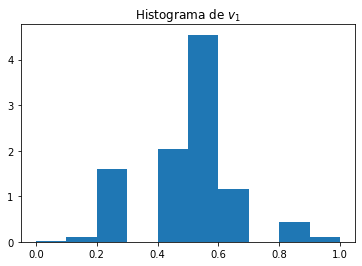

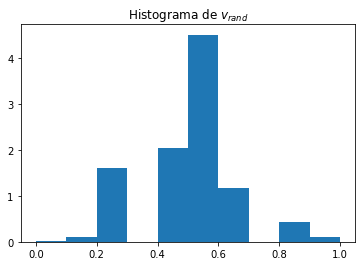

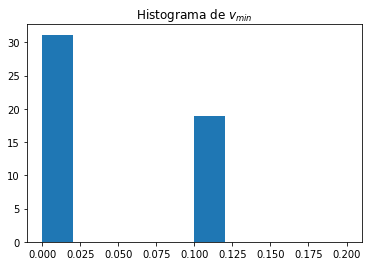

In [5]:
#Graficar Histogramas
#V1
plt.title(r'Histograma de $v_1$')
nV1, V1_bins, patches = plt.hist(x=V1, density=True)
#Vrand
plt.figure();
plt.title(r'Histograma de $v_{rand}$')
nVrand, Vrand_bins, patches = plt.hist(x=Vrand, density=True)
#Vmin
plt.figure();
plt.title(r'Histograma de $v_{min}$')
nVmin, Vmin_bins, patches = plt.hist(x=Vmin, density=True)

**(c)** Usando (b), graficar estimaciones para $\mathbb{P}[|v-\mu|>\epsilon]$ como una función de $\epsilon$, junto con la cota de Hoeffging $2e^{-2\epsilon^2N}$.

**En los siguientes gráficos, la línea azul representa la estimación de $\mathbb{P}[|v-\mu|>\epsilon]$ y la línea discontinua naranja la cota de Hoeffding.**

Text(0.5, 0, '$\\epsilon$')

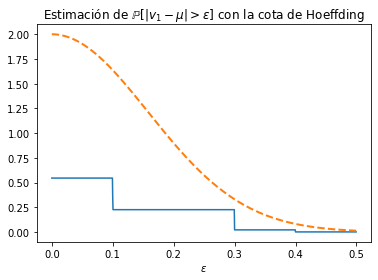

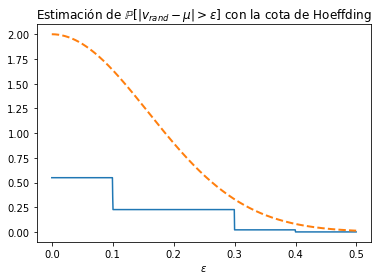

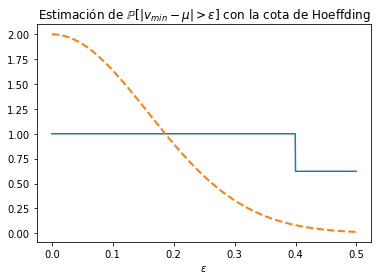

In [7]:
#Función que estima la probabilidad
def estimProb(epsilon, nV, v_bins, mu):
  nVal = nV/np.sum(nV)
  indexBin = v_bins[:-1]
  # Calcular la probabilidad de que la distancia a la media sea mayor a epsilon
  probGreatEps = np.sum(nVal[indexBin>(mu+epsilon)])
  probLessEps = np.sum(nVal[indexBin<(mu-epsilon)])
  return probGreatEps + probLessEps

arrEps = np.arange(0.0,0.5,0.0005)  #epsilon
probEpsV1 = np.zeros(len(arrEps))   #V1
probEpsVrand = np.zeros(len(arrEps))#Vrand
probEpsVmin = np.zeros(len(arrEps)) #Vmin
hoeffding = 2*np.exp(-2*np.square(arrEps)*k) #Cota de Hoeffding - N = # veces que se tira cada moneda (k)
#Llenar los arreglos
for i in range(len(arrEps)):
  probEpsV1[i]=estimProb(arrEps[i], nV1, V1_bins, mu)
  probEpsVrand[i]=estimProb(arrEps[i], nVrand, Vrand_bins, mu)
  probEpsVmin[i]=estimProb(arrEps[i], nVmin, Vmin_bins, mu)

#Graficar V1
plt.title(r'Estimación de $\mathbb{P}[|v_1-\mu|>\epsilon]$ con la cota de Hoeffding')
plt.plot(arrEps, probEpsV1)
plt.plot(arrEps, hoeffding, linestyle='dashed', linewidth=2)
plt.xlabel("$\epsilon$")
#Graficar Vrand
plt.figure()
plt.title(r'Estimación de $\mathbb{P}[|v_{rand}-\mu|>\epsilon]$ con la cota de Hoeffding')
plt.plot(arrEps, probEpsVrand)
plt.plot(arrEps, hoeffding, linestyle='dashed', linewidth=2)
plt.xlabel("$\epsilon$")
#Graficar Vmin
plt.figure()
plt.title(r'Estimación de $\mathbb{P}[|v_{min}-\mu|>\epsilon]$ con la cota de Hoeffding')
plt.plot(arrEps, probEpsVmin)
plt.plot(arrEps, hoeffding, linestyle='dashed', linewidth=2)
plt.xlabel("$\epsilon$")

**(d)** ¿Cuáles monedas obedecen la cota de Hoeffding y cuáles no? Justificar.

En las gráficas se ve que $c_1$ y $c_{rand}$ obedecen la cota de Hoeffding, mientras que $c_{min}$ no se ajusta a la cota. 

Esto ocurre  porque la forma en que se extrae $c_{min}$ depende y necesita del conjunto entro de datos, se elige la moneda que justo tiene la menor proporción de caras de todas las muestras, rompiendo una hipótesis necesaria para que la desigualdad de Hoeffding se cumpla. Además, $c_{min}$ parece sesgada, lo que afecta directamente a $v_{min}$ (solo toma valores de $0$ y $0.1$) para que no muestre la realidad del valor de $\mu$. 

Por otro lado, la forma de extraer las otras monedas dos monedas no requiere todo conjunto de muestras, haciendo que las muestras seleccionadas poco a poco se ajusten a la media $\mu$ y se cumpla la cota.


**(e)** Relacionar el punto anterior para el caso de mútiples contenedores con bolas (Figure 1.10).

El problema sería equivalente a tener 3 contenedores con 10000 pelotas, en los que hay 5000 pintadas de rojo y 5000 verde ($\mu=0.5$) para cada uno, y de los que se extraen 10 pelotas de la siguente forma: 

*   Para el primero, sacar 10 pelotas ($c_1$).
*   Para el segundo, dado un número aleatorio $1\leq q \leq 1000$, extraer y devolver $q$ veces 10 pelotas y quedarse con las del último intento ($c_{rand}$).
* Para el el tercero se sacan de 10 pelotas hasta dejar vacío el contenedor, agrupando las pelotas por extracción, y se toma el grupo de 10 pelotas que menos pelotas rojas tuvo ($c_{min}$). 

#**4. Ejercicio 1.11**
Dado un conjunto de datos $\mathcal{D}$ de 25 ejemplos de entrenamiento de una función objetivo desconocida $f:\mathcal{X}\to\mathcal{Y}$, dónde $\mathcal{X}=\mathbb{R}$ y $\mathcal{Y}=\{-1,+1\}$. Para llegar a conocer $f$, usamos el conjunto de hipótesis $\mathcal{H}=\{h_1,h_2\}$ con $h_1$ la función constante $+1$ y $h_2$ la función $-1$.

Consideremos dos algoritmos de aprendizaje, S (inteligente) y C (loco). S escoge la mejor función que se adapta a $\mathcal{D}$ y C escoje la otra hipótesis deliberadamente. Veamos cómo estos algoritmos se desenvuelven fuera de la muestra desde el punto de vista determinista y probabilistico. Asumamos que en el punto de vista probabilistico hay una distribución de probabilidad $\mathcal{X}$, y sea $\mathbb{P}[f(x)=+1]=p$.

**(a)** ¿Puede S producir una hipótesis que garantice un mejor rendimiento que el azar en cualquier punto fuera de $\mathcal{D}$?

No, porque al no tener acceso en el entrenamiento a los datos fuera de $\mathcal{D}$ puede darse el caso en el que (por azar puro) la hipótesis no clasifique correctamente a un elemnto y ese sería el punto débil que podría atacar una función que clasifique al azar. Por ejemplo, es claro que S debe escoger la hipótesis $h_1$ o $h_2$ según si es mayor el número de elmentos que su $y$ sea $+1$ o $-1$ en $\mathcal{D}$, digamos que es $+1$; entonces puede pasar que justo un elemento fuera de $\mathcal{D}$ su $y$ sea $-1$ y tenga la clasificación $+1$.

Pero si somos más laxos con la garantización, i.e, que en la mayoría de los casos la hiótesis se comporte mejjor que el azar, entonces sí. Pero esto dependería también de qué lo bien escogidos que estén los conjuntos $\mathcal{D}$ y $\mathcal{H}$.

**(b)** Asumir para el resto del ejercicio que todos los ejemplos en $\mathcal{D}$ tienen $y_n=+1$. ¿Es posible que la hipótesis que produce C puede ser mejor que la producida por S?

Sí es posible. Para este caso, la hipótesis elegida por S es $h_1=+1$ por lo que la elegida por C es $h_2=-1$. Entonces, puede pasar que la mayoría de elementos por fuera de $\mathcal{D}$ su $y$ sea $-1$, de dónde C tendría un mejor rendimiento que S.

**(c)** Si $p=0.9$, ¿Cuál es la probabilidad que S genere una mejor hipótesis que C?

Por el punto anterior, sabemos que S produce a $h_1=+1$. Entonces, la probabilidad de que un elemento en  $\mathcal{X}$ tenga su $y=+1$ es $0.9$.Supongamos que el tamaño de $\mathcal{X}$ es mucho mayor que el de $\mathcal{D}$ de tal forma que no afecte tanto haber seleccinado $25$ elementos con $y_n=1$ a la probabilidad, luego la $\mathbb{P}[f(x)=+1]\approx0.9$ para $x\in\mathcal{X}-\mathcal{D}$.

Así, probabilidad que S genere una mejor hipótesis que C es cercano a $0.9$.

**(d)** ¿Hay algún valor de $p$ para el que sea más probable que C produzca una hipótesis mejor que S? 

Si $p < 0.5$, con seguridad tengo que $\mathbb{P}[f(x)=-1]=1-p$ para $x\in \mathcal{X}$. Luego, es más probable para un elemento en el conjunto $x\in \mathcal{X}$ que $y=-1$ y por lo tanto la hipótesis escogida por S, $h_1=+1$, debería ser peor que la que resulta por C, $h_2=-1$.

#**5. Convergencia Algoritmo del Perceptron**
¿Qué interpretación tiene el valor de  $\left(\frac{||\theta^*||}{\gamma}\right)^2$ en lo difícil o lo fácil del problema de optimización del perceptron? ($\theta^*$ es el separador ideal y $0<\gamma \leq y_t\mathbf{\theta^* x_t}$ para todo $t$).

Si $\frac{||\theta^*||}{\gamma}$ es pequeño, eso significaria que $\gamma$ es grande y $||\theta^*||^2$ es pequeño, lo que haría el problema más sencillo porque $\gamma$ se puede ver como la menor distancia de todos los puntos al separador ideal y al ser grande hace que los datos sean más faciles de separar, y al ser pequeño $||\theta^*||$ hace que se puede empezar el algoritmo desde el origen gastando pocos pasos, ya el parecido entre $\theta^{(k)}$ de cada paso y $\theta^{*}$ crece como mínimo $\gamma$.

Por otro lado, si es pequeño resultaría en todo lo contrario: $\gamma$ pequeño y $||\theta^*||$ grande, haciendo el problema más difícil ya que tomaría más pasos converger a $\theta^*$.
 

#**6. XOR usando neuronas de McCulloch-Pitts** 
La siguente imagen muestra cómo se puede simular XOR, 

$$
\begin{array}{ccc}
\textbf{A} & \textbf{B} & \textbf{A XOR B} \\
1          & 1          & 0                \\
1          & 0          & 1                \\
0          & 1          & 1                \\
0          & 0          & 0               
\end{array}
$$

usando neuronas de McCulloch-Pitts:
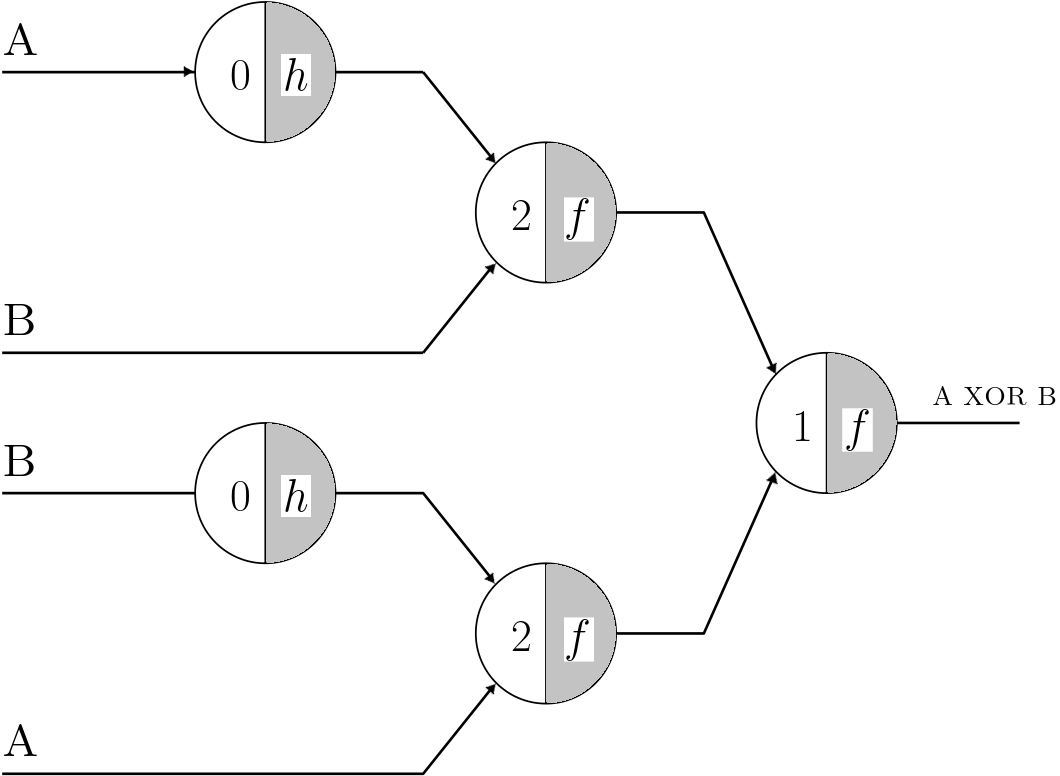

dónde A y B pueden tomar valores de $0$ o $1$ y

$\begin{align*}
h(x)&=\begin{cases} 1 && \text{ si } x\leq \theta \\ 0 && \text{ si } x> \theta\end{cases}\\
f(x)&=\begin{cases} 1 && \text{ si } x\geq \theta \\ 0 && \text{ si } x< \theta\end{cases}
\end{align*}$